--- Descripción del dataset: Loan Data ---

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score               

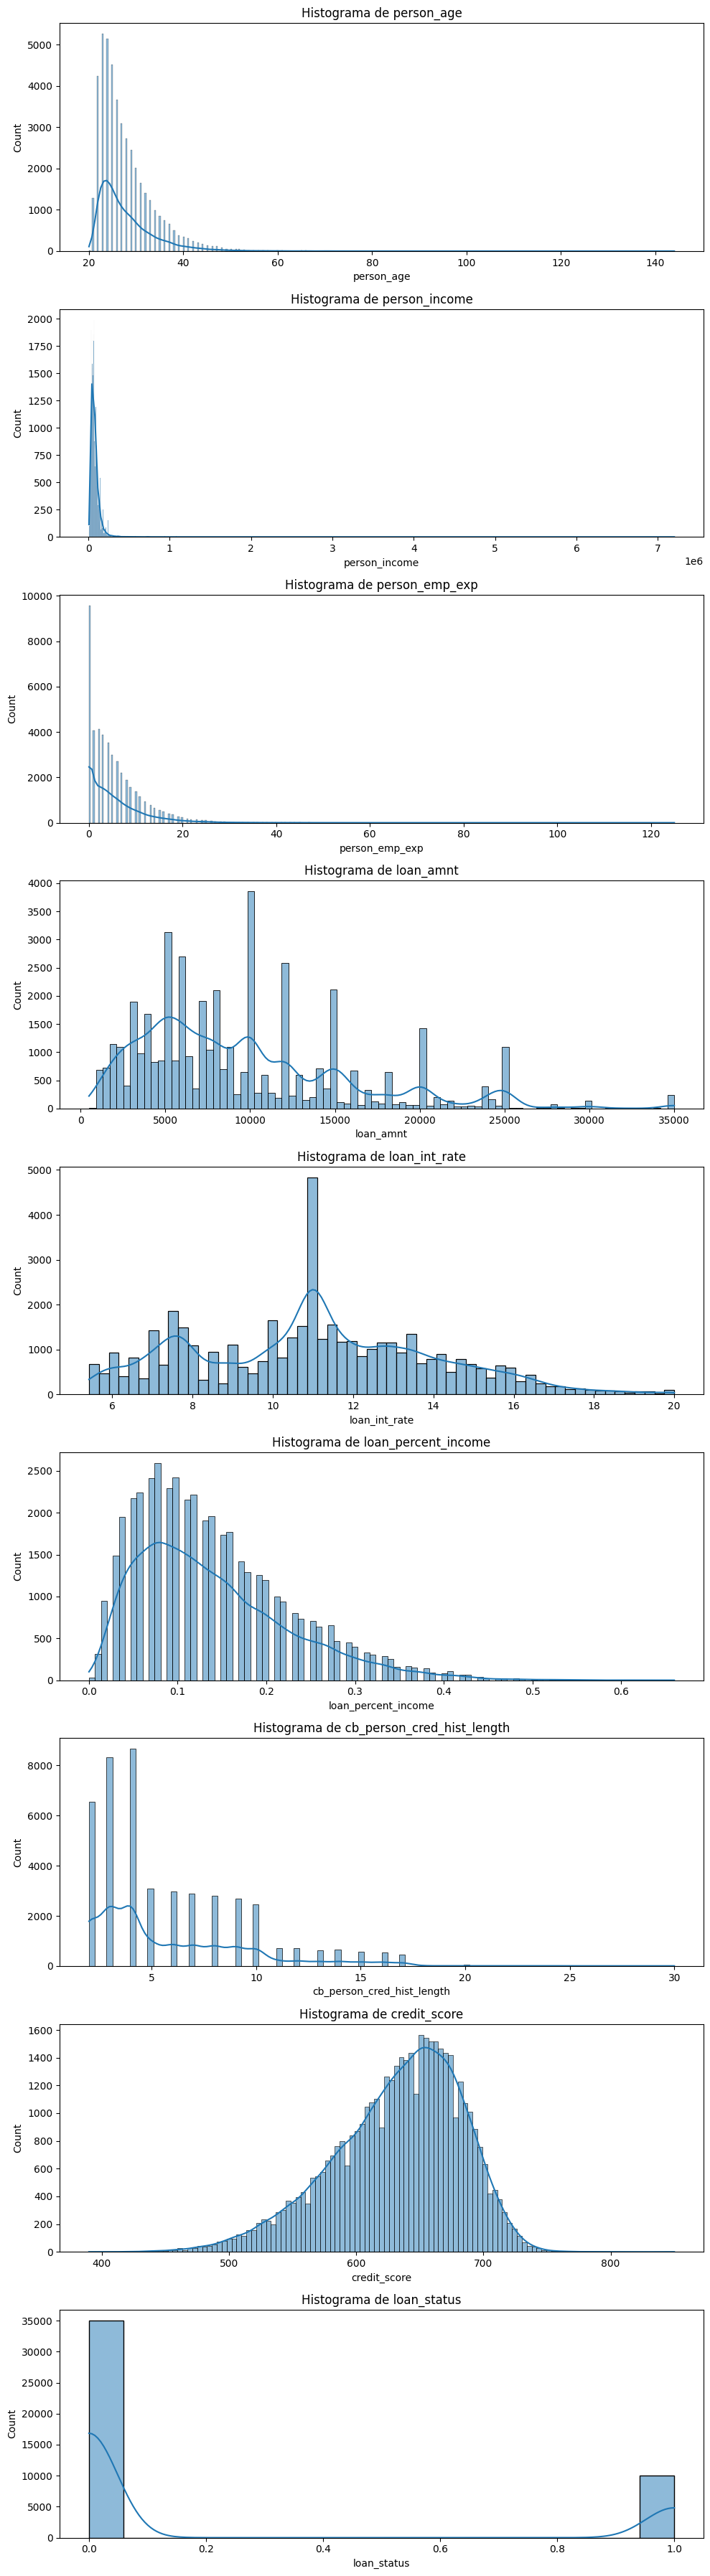

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para cargar y describir el conjunto de datos
def describe_dataset(df, name):
    print(f"--- Descripción del dataset: {name} ---\n")

    # Definir columnas numéricas y categóricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Información general:\n")
    print(df.info(), "\n")

    print(f"Tamaño del dataset: {df.shape}\n")

    print("Primeras filas del dataset:\n")
    print(df.head(), "\n")

    print("Descripción estadística:\n")
    print(df.describe(), "\n")

    print("Variables numéricas:\n")
    print(df[num_cols].describe(), "\n")

    print("Variables categóricas:\n")
    for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

    print("Valores nulos:\n")
    print(df.isnull().sum(), "\n")

    print("Valores duplicados:\n")
    print(df.duplicated().sum(), "\n")

    print("Outliers:\n")
    for columna in num_cols:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].shape[0]
        print(f"Cantidad de outliers en {columna}: {outliers_count}\n")

    # Graficar histogramas para cada columna numérica
    print("Histogramas para variables numéricas:\n")
    plt.figure(figsize=(10, len(num_cols) * 4))
    for i, columna in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f"Histograma de {columna}")
    plt.tight_layout()
    plt.show()

# Cargar el dataset y describirlo
df = pd.read_csv('drive/MyDrive/Data_excel/loan_data.csv')
describe_dataset(df, 'Loan Data')